**Load Data**

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart.csv')  # Adjust path if needed

# Show shape and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Display first few rows
df.head()

Shape: (303, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1




1.   List itemYou may see that thal includes 0, which often means "unknown"

2.   We'll treat thal = 0 as missing



In [2]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check value counts of suspected fields
print("\nUnique values in 'thal':\n", df['thal'].value_counts())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Unique values in 'thal':
 thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64


**Replace thal = 0 with NaN and optionally drop them **

In [3]:
import numpy as np

# Replace 0 with NaN
df['thal'] = df['thal'].replace(0, np.nan)

# Drop rows with missing thal for now (or you can impute later)
df = df.dropna(subset=['thal'])

print("After cleaning, new shape:", df.shape)

After cleaning, new shape: (301, 14)


**Basic Descriptive Statistics**

In [4]:
# Summary stats
df.describe()

# Target distribution
df['target'].value_counts(normalize=True)

,proportion
target,
1,0.54485
0,0.45515


***Exploratory Data Analysis (EDA)***

**Target Distribution: We'll se how many people in the dataset have heart disease:**

/tmp/ipython-input-5-4233660798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


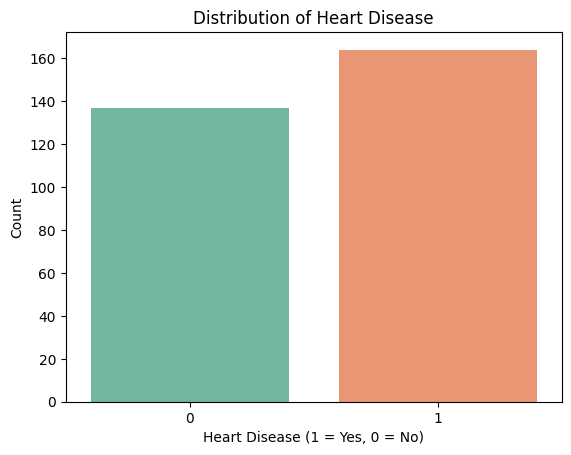

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target variable distribution
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

**Correlation Heatmap: To examine relationships between numerical features and the target**

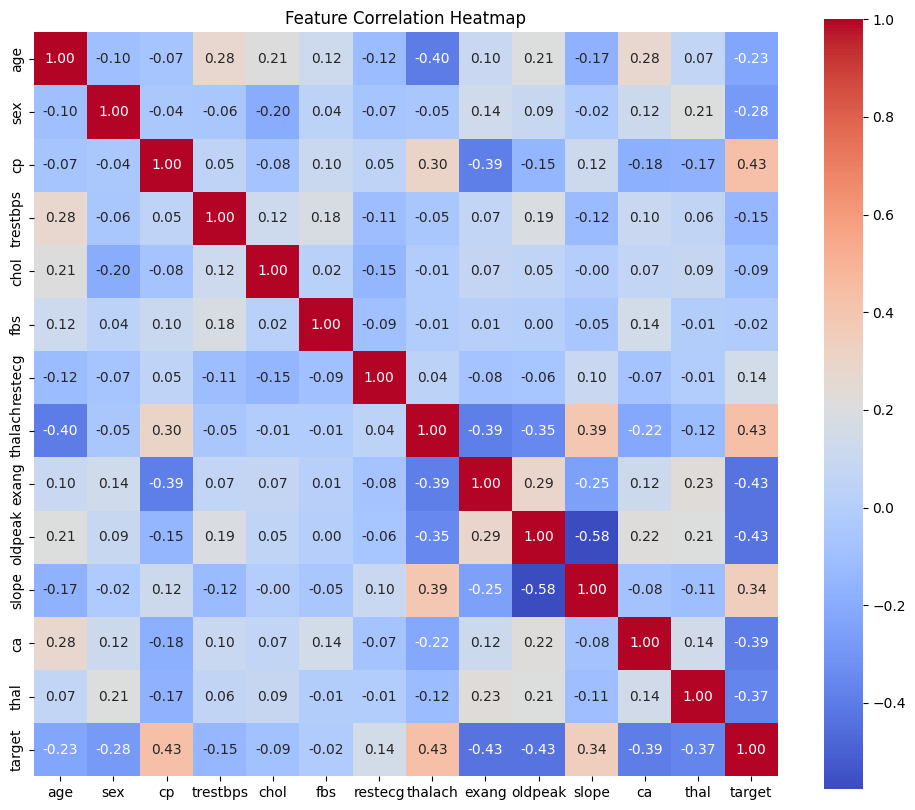

In [6]:
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

*Shows which features are most associated with the target (and with each other)*

**Feature Distributions by Target (Boxplots): Comparing how key numerical features differ between people with and without heart disease**

/tmp/ipython-input-7-2615796671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set3')
/tmp/ipython-input-7-2615796671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set3')
/tmp/ipython-input-7-2615796671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set3')
/tmp/ipython-input-7-2615796671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

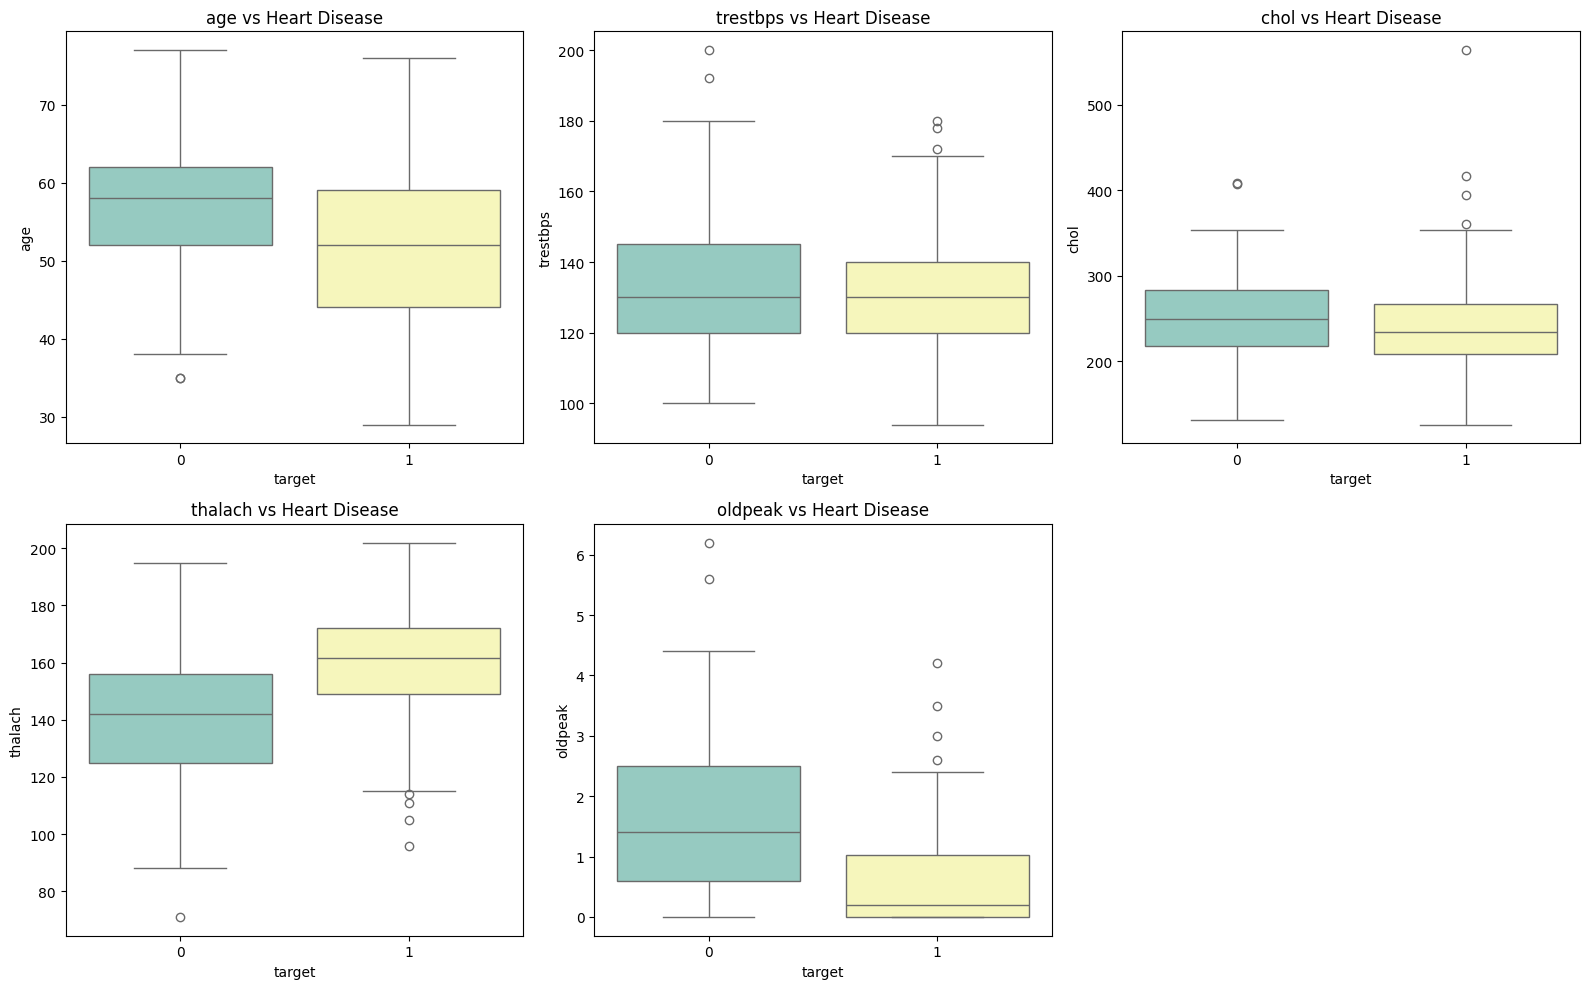

In [7]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=df, palette='Set3')
    plt.title(f"{col} vs Heart Disease")
    plt.tight_layout()

plt.show()

**Categorical Feature Analysis: Visualizing distributions of features like chest pain type, sex, and thalassemia**

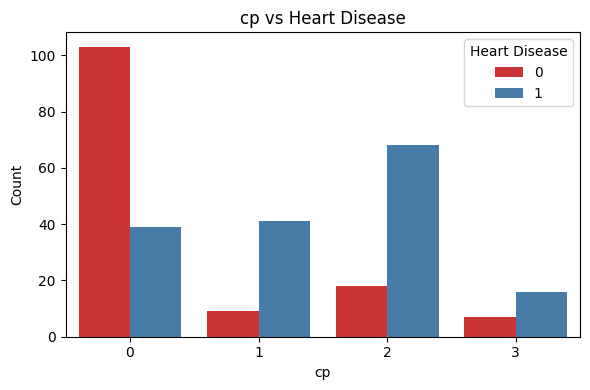

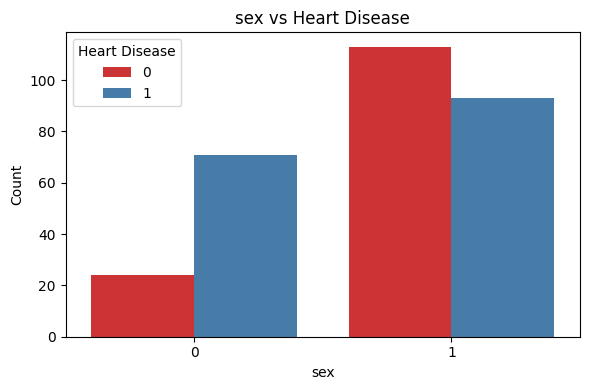

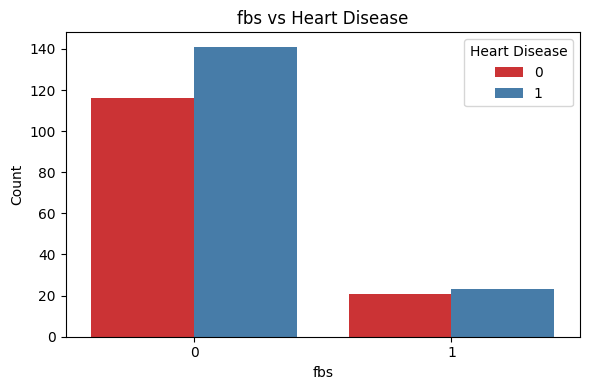

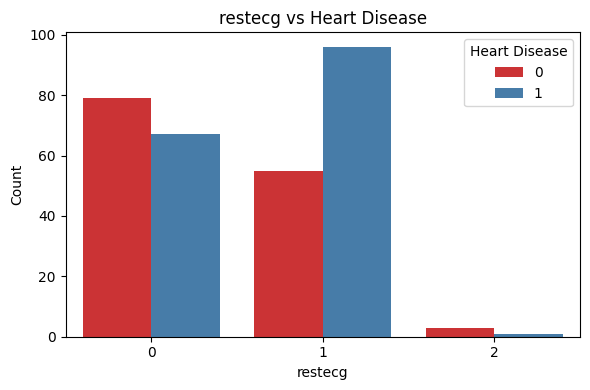

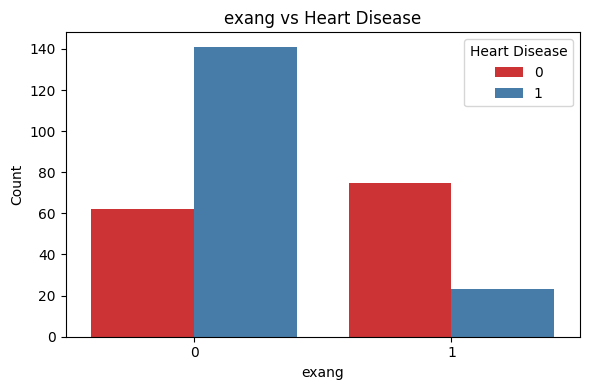

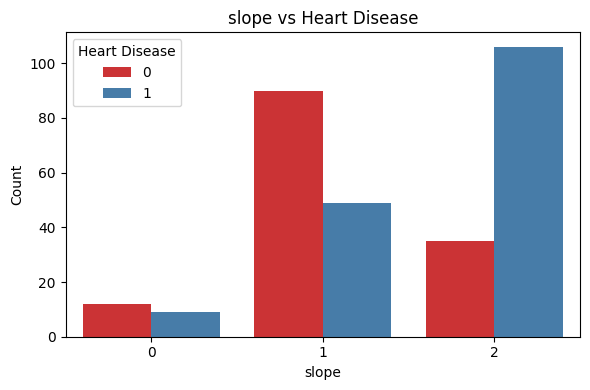

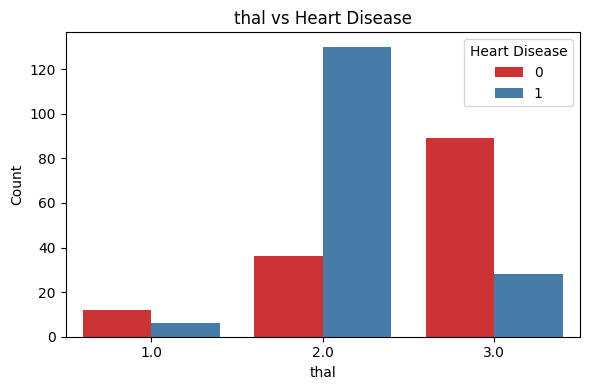

In [8]:
categorical_cols = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='target', data=df, palette='Set1')
    plt.title(f"{col} vs Heart Disease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Heart Disease')
    plt.tight_layout()
    plt.show()

*Helps detect patterns like certain chest pain types being more common in patients with heart disease.*

***Data Preprocessing & Feature Engineering***

**Encode Categorical Variables**

In [9]:
# Categorical columns to encode
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check result
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2.0,thal_3.0
0,63,1,145,233,1,150,0,2.3,0,1,False,False,True,False,False,False,False,False,False
1,37,1,130,250,0,187,0,3.5,0,1,False,True,False,True,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,True,False,False,False,False,False,True,True,False
3,56,1,120,236,0,178,0,0.8,0,1,True,False,False,True,False,False,True,True,False
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,True,False,False,True,True,False


**Scale Numeric Features: using StandardScaler**

In [10]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
scale_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create scaler and apply
scaler = StandardScaler()
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2.0,thal_3.0
0,0.947829,1,0.760168,-0.260565,1,0.011339,0,1.082105,0,1,False,False,True,False,False,False,False,False,False
1,-1.910633,1,-0.093815,0.067433,0,1.630385,0,2.115297,0,1,False,True,False,True,False,False,False,True,False
2,-1.470869,0,-0.093815,-0.820090,0,0.974015,0,0.307211,0,1,True,False,False,False,False,False,True,True,False
3,0.178243,1,-0.663137,-0.202683,0,1.236563,0,-0.209384,0,1,True,False,False,True,False,False,True,True,False
4,0.288184,0,-0.663137,2.074005,0,0.580193,1,-0.381583,0,1,False,False,False,True,False,False,True,True,False


**Scaling is important for models that are sensitive to magnitude (e.g., logistic regression, SVMs).**

**Train-Test Split**

In [11]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (240, 18)
Test size: (61, 18)


**Adding Engineered Features**

In [12]:
# Age group buckets
df_encoded['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 77], labels=['30s', '40s', '50s', '60+'])

# Cholesterol-to-age ratio
df_encoded['chol_age_ratio'] = df['chol'] / df['age']

# Re-encode new categorical column
df_encoded = pd.get_dummies(df_encoded, columns=['age_group'], drop_first=True)

# Update X with new features
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Re-split (if needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

***Model Building & Evaluation***

**Training a Logistic Regression (Baseline)**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

**Evaluate Logistic Regression**

In [14]:
# Classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[22  6]
 [ 3 30]]
ROC-AUC: 0.904


**Random Forest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

ROC-AUC: 0.8549783549783551


**XGBoost**

In [16]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_proba))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:24:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC-AUC: 0.8636363636363636


**Feature Importance via Coefficients (Logistic Regression)**


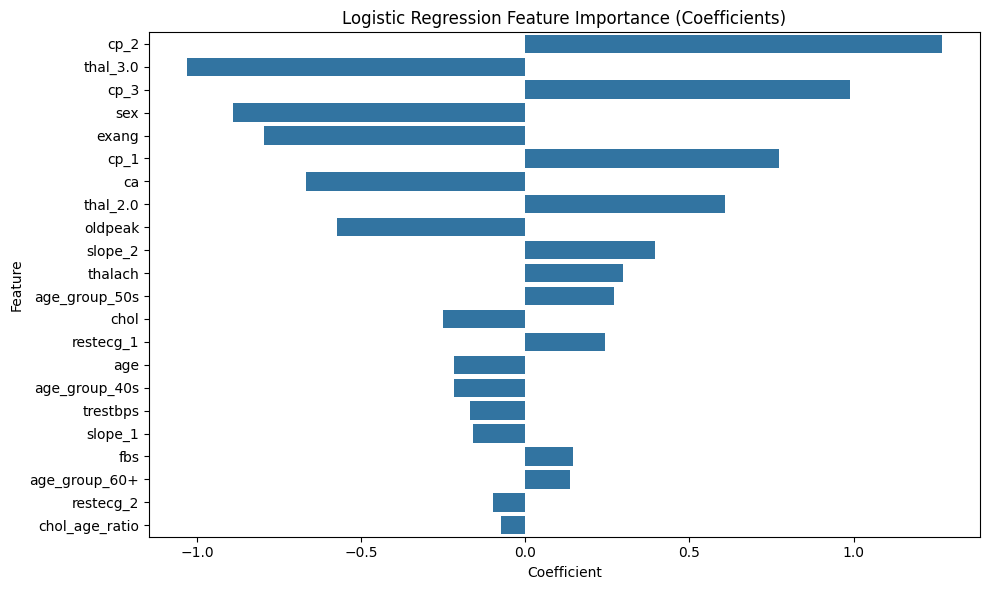

In [51]:
# Coefficients and feature names
import pandas as pd
import numpy as np

coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute impact
coeffs['AbsCoeff'] = np.abs(coeffs['Coefficient'])
coeffs = coeffs.sort_values(by='AbsCoeff', ascending=False)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeffs)
plt.title('Logistic Regression Feature Importance (Coefficients)')
plt.tight_layout()
plt.show()




*   List itemEach bar represents a feature in your model.

*   The length of the bar shows the magnitude of its impact.

*   The direction (positive or negative) indicates whether the feature increases or decreases the predicted risk of heart disease (target = 1).






**How to Interpret This Specific Chart**:
***Coefficient Sign	Interpretation***
*   Positive (+)	Increases likelihood of heart disease
*   Negative (−)	Decreases likelihood of heart disease


## 🧾 Conclusion

This project aimed to build an interpretable machine learning model to predict the presence of heart disease using open clinical datasets. The final Logistic Regression model achieved strong predictive performance, with:

- **Accuracy:** 85%
- **ROC-AUC:** 0.90
- **F1-Score:** 0.87

**Key findings include:**
- **Chest pain type** was the most influential predictor, followed by **abnormal thalassemia test results** and **exercise-induced angina**.
- Features like **lower ST depression** (`oldpeak`) and **normal thalassemia** (`thal_2.0`) significantly reduced risk.
- **Model interpretability** was prioritized, enabling transparency in clinical settings.

This analysis reinforces the importance of structured clinical data in early diagnosis and risk stratification of heart disease. With minimal preprocessing and strong signal features, even a simple model like logistic regression can yield valuable, explainable results.



